<a href="https://colab.research.google.com/github/pups-dvlper/ybi-project/blob/main/Servo_Mechanism_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Servo Prediction using Linear Regression**

#**Get Understanding about Dataset**
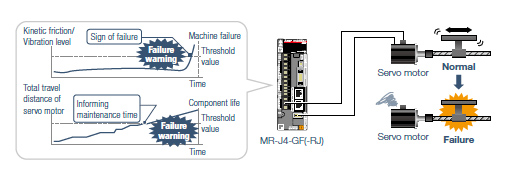

#What is Servo Prediction?
An integrative servo analysis platform is used to carry out simulations for a commercial drive using patterned media technology. Servo performance is compared between the conventional linear control and some advanced servo control algorithms. In addition, the effects on the PES quality due to the timing jitter on the sampling time, quantization of PES signal, and quantization of control signal are evaluated.

Servo motors can make precise and repeatable motions. Motion such as this is vital for moving sensors, controlling robot legs or arms, and moving them to a known position. Its uses are so engineers can predict robot behavior, so a robot can repeat things in automation, or so code can move limbs to accurately respond to what their sensors are instructing them. Raspberry Pi or add-on boards can control them.

#**Import Library**

In [50]:
import pandas as pd

In [51]:
import numpy as np

#**Import CSV as DataFrame**

In [4]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

#**Get the First Five Rows of DataFrame**

In [5]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


#**Get Information of DataFrame**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


#**Get the Summary Statistics**

In [7]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


#**Get Columns Names**

In [10]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

#**Get Shape of DataFrame**

In [11]:
df.shape

(167, 5)

#**Get Categories and Counts of Categorical Variables**

In [12]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [13]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

#**Get Encoding of Categorical Features**

In [19]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [20]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

#**Define y(dependent or label or target variable) and X(independent or features or attribute Variable)**

In [16]:
y=df['Class']

In [17]:
y.shape

(167,)

In [18]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [21]:
X = df[['Motor','Screw','Pgain','Vgain']]

#**or use .drop function to define X**

In [22]:
X = df.drop('Class',axis=1)

In [23]:
X.shape

(167, 4)

In [24]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


#**Get Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2529)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

#**Get Model Train**

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

#**Get Model Prediction**

In [33]:
y_pred = lr.predict(X_test)

In [34]:
y_pred.shape

(51,)

In [35]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

#**Get Model Evaluation**

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [38]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [39]:
r2_score(y_test,y_pred)

0.6807245170563927

#**Get Visualization of Actual Vs Predicted Results**

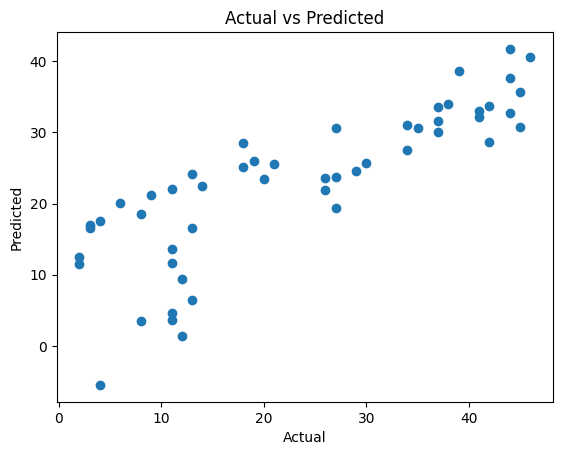

In [41]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#**Get Future Predictions**

In [42]:
X_new = df.sample(1)

In [43]:
X_new

,Motor,Screw,Pgain,Vgain,Class
28,2,3,3,2,37


In [44]:
X_new.shape

(1, 5)

In [45]:
X_new = X_new.drop('Class', axis = 1)

In [46]:
X_new

,Motor,Screw,Pgain,Vgain
28,2,3,3,2


In [47]:
X_new.shape

(1, 4)

In [48]:
y_pred_new = lr.predict(X_new)

In [49]:
y_pred_new

array([31.63543611])